In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import gc
import os
# import numpy as np
from skimage import io, color, filters, measure, exposure, feature
from shapely.geometry import MultiPoint, Polygon
import shapely
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection



In [26]:

from scipy.spatial.distance import cdist

n = 30 #number of cells in each direction
N = n**3 #number of cells total


v_0 = 80 #volume of one cell
r_0 = np.cbrt(v_0)


xs, ys, zs = np.zeros(N), np.zeros(N), np.zeros(N)

overall_neighbour_list = []
positions = []

mpl.rcParams.update({'font.size': 15})

#make a list of neighbours
for i in range(n):
    for j in range(n):
        for k in range(n):
            neighbour_list = []
            index = i*(n**2) + j*n + k
            positions.append(np.array([i*r_0, j*r_0, k*r_0])) 
            xs[index], ys[index], zs[index] = i*r_0, j*r_0, k*r_0
            for i_ in range(i-1, i+2):
                for j_ in range(j-1, j+2):
                    for k_ in range(k-1, k+2):
                        new_index = i_*(n**2) + j_*n + k_
                        if (0 <= i_ < n) and (0 <= j_ < n) and (0 <= k_ < n): 
                            if 0 <= new_index < N and new_index != index:
                                neighbour_list.append(new_index)
            overall_neighbour_list.append(np.array(neighbour_list))


print(len(positions))
neighbours= overall_neighbour_list
dists_between_positions = cdist(positions, positions)


27000


In [ ]:
av_neighbours_c = np.zeros((16, 10))


for c_, c in enumerate(range(10, 26)):
    for r_, r in enumerate(range(10)):
        occupations = np.load("c_varying/c_varying_"+str(c)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
        number_of_neighbours = []
        for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
            if occupations[n] == 1:
                occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
                number_of_neighbours.append(occupied_neighbour_no)
        av_neighbours_c[c_][r_] = np.average(number_of_neighbours)
        
np.save("av_neighbours_c.npy", av_neighbours_c)


In [ ]:

av_neighbours_c = np.load("av_neighbours_c.npy", allow_pickle=True)
c_curv = np.load("curvature_matrix_c.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in c_curv]
std_curv = [np.std(curvs) for curvs in c_curv]
cs = [c/26 for c in range(10, 26)]

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_c], [np.std(neighs/26) for neighs in av_neighbours_c]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=cs, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax.set_ylim(0.5, 1)
ax2.set_ylim(0.5, 1)
ax2.errorbar(x=cs, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
#ax.set_xlabel("Contact inhibition threshold")
ax.set_xlabel("Neighbour suppression threshold " + r'$\kappa$')
ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')
plt.tight_layout()
plt.show()

fig.savefig("c_neigh_plot.eps", format='eps', dpi=300)


In [ ]:
# av_neighbours_alpha = np.zeros((10, 10))


# for c_, alpha in enumerate([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("alpha_varying/alpha_varying_"+str(alpha)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_alpha[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_alpha.npy", av_neighbours_alpha)

av_neighbours_alpha = np.load("av_neighbours_alpha.npy", allow_pickle=True)
alpha_curv = np.load("curvature_matrix_alpha.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in alpha_curv[:10]]
std_curv = [np.std(curvs) for curvs in alpha_curv[:10]]
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

print(alphas, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_alpha], [np.std(neighs/26) for neighs in av_neighbours_alpha]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.5, 1)
ax2.set_ylim(0.5, 1)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=alphas, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=alphas, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Intrinsic fitness "+r'$\alpha$')
ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("alpha_neigh_plot.eps", format='eps', dpi=300)


In [ ]:
av_neighbours_h = np.zeros((10, 10))


# for c_, h in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("h_varying/h_varying_"+str(h)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_h[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_h.npy", av_neighbours_h)

av_neighbours_h = np.load("av_neighbours_h.npy", allow_pickle=True)
h_curv = np.load("curvature_matrix_h.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in h_curv[:10]]
std_curv = [np.std(curvs) for curvs in h_curv[:10]]
hs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print(hs, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_h], [np.std(neighs/26) for neighs in av_neighbours_h]



fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.5, 1)
ax2.set_ylim(0.5, 1)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=hs, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=hs, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Steepness of saturation " + '$\it{h}$')
ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("h_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
# av_neighbours_tau = np.zeros((10, 10))


# for c_, tau in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("tau_varying/tau_varying_"+str(tau)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of ttauese stauould tauave occupation number 1 or 0 after ttaue last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_tau[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_tau.npy", av_neighbours_tau)


av_neighbours_tau = np.load("av_neighbours_tau.npy", allow_pickle=True)
tau_curv = np.load("curvature_matrix_tau.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in tau_curv[:10]]
std_curv = [np.std(curvs) for curvs in tau_curv[:10]]
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print(taus, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_tau], [np.std(neigh/26) for neigh in av_neighbours_tau]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0, 1)
ax2.set_ylim(0.5, 1)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=taus, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=taus, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Surface tension "+r'$\tau$')
ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("tau_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
# av_neighbours_sigma = np.zeros((10, 10))


# for c_, sigma in enumerate([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("sigma_varying/sigma_varying_"+str(sigma)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tsigmaese ssigmaould sigmaave occupation number 1 or 0 after tsigmae last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_sigma[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_sigma.npy", av_neighbours_sigma)

av_neighbours_sigma = np.load("av_neighbours_sigma.npy", allow_pickle=True)
sigma_curv = np.load("curvature_matrix_sigma.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in sigma_curv[:10]]
std_curv = [np.std(curvs) for curvs in sigma_curv[:10]]
sigmas = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

print(sigmas, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_sigma], [np.std(neigh/26) for neigh in av_neighbours_sigma]



fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=sigmas, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=sigmas, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Senescence rate "+r'$\sigma$')
ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("sigma_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
# av_neighbours_beta = np.zeros((10, 10))


# for c_, beta in enumerate(range(1, 11)):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("beta_varying_fig4/"+str(beta)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tbetaese sbetaould betaave occupation number 1 or 0 after tbetae last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_beta[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_beta_fig4.npy", av_neighbours_beta)

av_neighbours_beta = np.load("av_neighbours_beta_fig4.npy", allow_pickle=True)
beta_curv = np.load("curvature_matrix_beta_fig4.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in beta_curv[:10]]
std_curv = [np.std(curvs) for curvs in beta_curv[:10]]
betas = range(1, 11)

print(betas, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_beta], [np.std(neigh/26) for neigh in av_neighbours_beta]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.75, 1.0)
ax2.set_ylim(0.85, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=betas, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=betas, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Nutrient-dependent fitness "+r'$\beta$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("beta_fig4_neigh_plot.eps", format='eps', dpi=300)


In [ ]:
# av_neighbours_h = np.zeros((5, 10))


# for c_, h in enumerate([0.01, 0.1, 1.0, 10, 100]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("h_varying_fig3/"+str(h)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_h[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_h_fig3.npy", av_neighbours_h)
av_neighbours_h = np.load("av_neighbours_h_fig3.npy", allow_pickle=True)
h_curv = np.load("curvature_matrix_h_fig3.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in h_curv[:5]]
std_curv = [np.std(curvs) for curvs in h_curv[:5]]
hs =[0.01, 0.1, 1.0, 10, 100]

print(hs, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_h], [np.std(neigh/26) for neigh in av_neighbours_h]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.75, 1.0)
ax2.set_ylim(0.85, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=np.log(hs)/np.log(10), y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=np.log(hs)/np.log(10), y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Steepness of saturation " + '$\it{h}$')
ax2.set_xticks(ticks=[-2, -1, 0, 1, 2], labels=['$\mathregular{10^{-2}}$', '$\mathregular{10^{-1}}$', '$\mathregular{10^0}$', '$\mathregular{10^1}$', '$\mathregular{10^2}$'])
ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("h_fig3_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
# av_neighbours_tau = np.zeros((10, 10))


# for c_, tau in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("tau_varying_fig3/"+str(tau)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of ttauese stauould tauave occupation number 1 or 0 after ttaue last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_tau[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_tau_fig3.npy", av_neighbours_tau)
av_neighbours_tau = np.load("av_neighbours_tau_fig3.npy", allow_pickle=True)
tau_curv = np.load("curvature_matrix_tau_fig3.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in tau_curv[:10]]
std_curv = [np.std(curvs) for curvs in tau_curv[:10]]
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print(taus, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_tau], [np.std(neigh/26) for neigh in av_neighbours_tau]



fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.6, 1.0)
ax2.set_ylim(0.6, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=taus, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=taus, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Surface tension "+r'$\tau$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("tau_fig3_neigh_plot.eps", format='eps', dpi=300)


In [ ]:
# av_neighbours_c = np.zeros((16, 10))


# for c_, c in enumerate(range(10, 26)):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("c_varying_fig3/"+str(c)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tcese scould cave occupation number 1 or 0 after tce last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_c[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_c_fig3.npy", av_neighbours_c)
av_neighbours_c = np.load("av_neighbours_c_fig3.npy", allow_pickle=True)
c_curv = np.load("curvature_matrix_c_fig3.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in c_curv]
std_curv = [np.std(curvs) for curvs in c_curv]
cs = [c/26 for c in list(range(10, 26))]

print(cs, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_c], [np.std(neigh/26) for neigh in av_neighbours_c]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.75, 1.0)
ax2.set_ylim(0.9, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=cs, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=cs, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Neighbour suppression threshold "+r'$\kappa$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("c_fig3_neigh_plot.eps", format='eps', dpi=300)


In [ ]:
# av_neighbours_alpha = np.zeros((10, 10))


# for c_, alpha in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("alpha_varying_fig4/"+str(alpha)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of talphaese salphaould alphaave occupation number 1 or 0 after talphae last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_alpha[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_alpha_fig4.npy", av_neighbours_alpha)
av_neighbours_alpha = np.load("av_neighbours_alpha_fig4.npy", allow_pickle=True)
alpha_curv = np.load("curvature_matrix_alpha_fig4.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in alpha_curv[:10]]
std_curv = [np.std(curvs) for curvs in alpha_curv[:10]]
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print(alphas, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_alpha], [np.std(neigh/26) for neigh in av_neighbours_alpha]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.75, 1.0)
ax2.set_ylim(0.9, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=alphas, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=alphas, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Intrinsic fitness "+r'$\alpha$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("alpha_fig4_neigh_plot.eps", format='eps', dpi=300)


In [ ]:
# av_neighbours_c = np.zeros((16, 10))


# for c_, c in enumerate(range(10, 26)):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("c_varying_fig4/"+str(c)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tcese scould cave occupation number 1 or 0 after tce last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_c[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_c_fig4.npy", av_neighbours_c)

av_neighbours_c = np.load("av_neighbours_c_fig4.npy", allow_pickle=True)
c_curv = np.load("curvature_matrix_c_fig4.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in c_curv]
std_curv = [np.std(curvs) for curvs in c_curv]
cs = [c/26 for c in list(range(10, 26))]

print(cs, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_c], [np.std(neigh/26) for neigh in av_neighbours_c]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.75, 1.0)
ax2.set_ylim(0.9, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=cs, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=cs, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax2.set_xlabel("Neighbour suppression threshold "+r'$\kappa$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("c_fig4_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
# av_neighbours_q = np.zeros((10, 10))


# for c_, q in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("q_varying_fig5/"+str(q)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tqese sqould qave occupation number 1 or 0 after tqe last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_q[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_q_fig5.npy", av_neighbours_q)

av_neighbours_q = np.load("av_neighbours_q_fig5.npy", allow_pickle=True)
q_curv = np.load("curvature_matrix_q_fig5.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in q_curv[:10]]
std_curv = [np.std(curvs) for curvs in q_curv[:10]]
qs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


print(qs, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_q], [np.std(neigh/26) for neigh in av_neighbours_q]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.75, 1.0)
ax2.set_ylim(0.9, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=qs, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=qs, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Differentiation probability "+ '$\it{q}$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("q_fig5_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
av_neighbours_q = np.zeros((10, 10))

# #treat q=0.9 as a special case with a special n, except from automated analysis
# c_, q = 10, 0.9
# high_q_vector_neigh = np.zeros(10)
# for r_, r in enumerate(range(10)):
#         occupations = np.load("q_varying_fig6/"+str(q)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tbetaese sbetaould betaave occupation number 1 or 0 after tbetae last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         high_q_vector_neigh[r_] = np.average(number_of_neighbours)
        
# # np.save("high_q_vector_neigh.npy", high_q_vector_neigh)

# av_neighbours_q[-1] = np.load("high_q_vector_neigh.npy", allow_pickle=True)


# for c_, q in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("q_varying_fig6/"+str(q)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         for n in range(N): #all of tqese sqould qave occupation number 1 or 0 after tqe last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_q[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_q_fig6.npy", av_neighbours_q)
av_neighbours_q = np.load("av_neighbours_q_fig6.npy", allow_pickle=True)
q_curv = np.load("curvature_matrix_q_fig6.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in q_curv[:10]]
std_curv = [np.std(curvs) for curvs in q_curv[:10]]
qs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print(qs, av_curv)

av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_q], [np.std(neigh/26) for neigh in av_neighbours_q]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.7, 1.0)
ax2.set_ylim(0.9, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=qs, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=qs, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Differentiation probability "+ '$\it{q}$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()
fig.savefig("q_fig6_neigh_plot.eps", format='eps', dpi=300)

In [ ]:
av_neighbours_beta = np.zeros((11, 10))
av_time_beta = np.zeros((11, 10))


# #treat beta=0.01 as a special case with a special n, except from automated analysis as it was run with a larger gridsize (n=40)
# c_, beta = 10, 5000
# high_beta_vector_neigh = np.zeros(10)
# high_beta_vector_t = np.zeros(10)
# for r_, r in enumerate(range(10)):
#         occupations = np.load("beta_varying_depletion/"+str(beta)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         lis = np.load("beta_varying_depletion/"+str(beta)+"_"+str(r)+"_params_time.npy", allow_pickle=True)
#         high_beta_vector_t[r_] = lis[-1]*100
#         for n in range(N): #all of tbetaese sbetaould betaave occupation number 1 or 0 after tbetae last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         high_beta_vector_neigh[r_] = np.average(number_of_neighbours)
        
# np.save("high_beta_vector_neigh.npy", high_beta_vector_neigh)
# np.save("high_beta_vector_t.npy", high_beta_vector_t)

# av_neighbours_beta[10] = np.load("high_beta_vector_neigh.npy", allow_pickle=True)
# av_time_beta[10] = np.load("high_beta_vector_t.npy", allow_pickle=True)

# for c_, beta in enumerate([0.001*i for i in range(10)]):
#     for r_, r in enumerate(range(10)):
#         occupations = np.load("beta_varying_depletion/"+str(beta)+"_"+str(r)+"_occupations.npy", allow_pickle=True)
#         number_of_neighbours = []
#         lis = np.load("beta_varying_depletion/"+str(beta)+"_"+str(r)+"_params_time.npy", allow_pickle=True)
#         av_time_beta[c_][r_] = lis[-1]*100
#         for n in range(N): #all of tbetaese sbetaould betaave occupation number 1 or 0 after tbetae last adjustment step
#             if occupations[n] == 1:
#                 occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n])))
#                 number_of_neighbours.append(occupied_neighbour_no)
#         av_neighbours_beta[c_][r_] = np.average(number_of_neighbours)
        
# np.save("av_neighbours_beta_depletion.npy", av_neighbours_beta)

av_neighbours_beta = np.load("av_neighbours_beta_depletion.npy", allow_pickle=True)
beta_curv = np.load("curvature_matrix_beta_depletion.npy", allow_pickle=True)

av_curv = [np.average(curvs) for curvs in beta_curv]
std_curv = [np.std(curvs) for curvs in beta_curv]
betas = [0.001*i for i in range(11)]


av_neighbours_av, av_neighbours_std = [np.average(neighs/26) for neighs in av_neighbours_beta], [np.std(neigh/26) for neigh in av_neighbours_beta]


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(0.5, 1.0)
ax2.set_ylim(0.8, 1.0)
ax.axhline(0.78, linestyle='--', color='blue')
ax.errorbar(x=betas, y=av_curv, yerr=std_curv, fmt='o', color='blue', capsize=5)
ax.tick_params(axis='y', colors='blue')
ax2.errorbar(x=betas, y=av_neighbours_av, yerr=av_neighbours_std, fmt='o', color='crimson', capsize=5)
ax.set_xlabel("Nutrient-depletion level " + r'$\eta$')

ax.set_ylabel("Organoid circularity", color='blue')
ax2.set_ylabel("Occupied-neighbour fraction", color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.show()

av_t_2 = [np.average(ts) for ts in av_time_beta]
std_t_2 =  [np.std(ts) for ts in av_time_beta]

print(av_t_2, std_t_2)

fig.savefig("depletion_neigh_plot.eps", format='eps', dpi=300)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


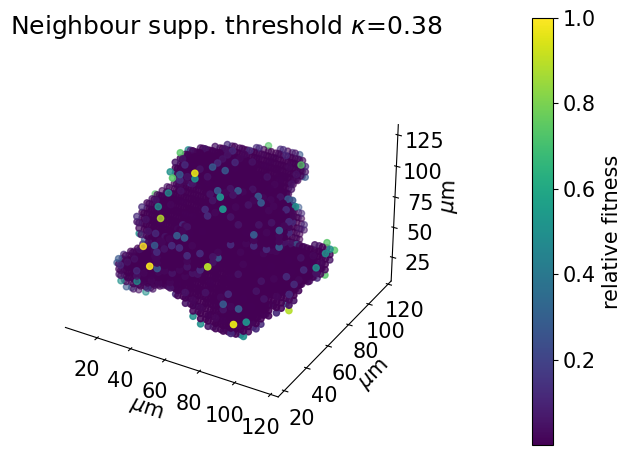

9956

In [29]:
contact_inhib_thresh=10
r=0
alpha=0
beta=10
h=1

ythresh = min(ys) + (max(ys)-min(ys))/2

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("c_varying/c_varying_"+str(contact_inhib_thresh)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Neighbour supp. threshold "+ r'$\kappa$'+ "="+str(np.around(contact_inhib_thresh/26, decimals=2)))
fig.tight_layout()
fig.savefig("c_illus_fig6"+str(contact_inhib_thresh)+"_"+str(r)+".eps", format="eps", dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

n check 27000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


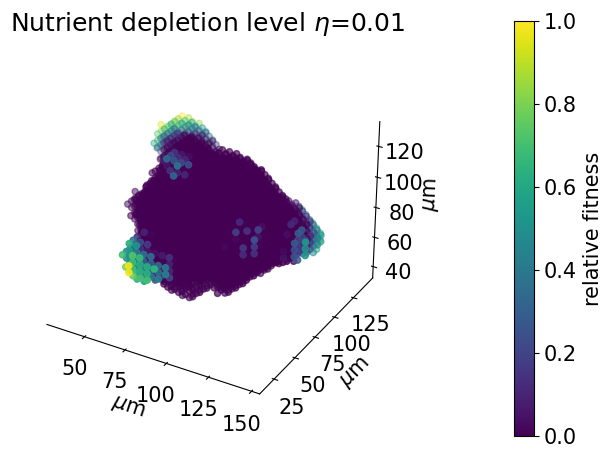

2733

In [5]:
beta=0.01
r=0
alpha=1

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

if beta == 0.01:
    occupations = np.load("beta_varying_depletion/5000_"+str(r)+"_occupations.npy", allow_pickle=True)
else:
    occupations = np.load("beta_varying_depletion/"+str(beta)+"_"+str(r)+"_occupations.npy", allow_pickle=True)


for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step- CHECK GRID IS SET TO CORRECT SIZE For this run
    if occupations[n] == 1:
        dists_to_other_cells = dists_between_positions[n][np.where(occupations==1)[0]]
        dists_to_other_cells = dists_to_other_cells[np.nonzero(dists_to_other_cells)[0]]#n records distances to all other cells, except itself
        prob_rep = alpha - np.nansum(beta/dists_to_other_cells) if len(dists_to_other_cells) > 0 else alpha
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Nutrient depletion level "+ r'$\eta$'+ "="+str(beta))
fig.tight_layout()
fig.savefig("beta_varying_depletion/"+str(beta)+"_"+str(r)+".eps", format="eps", dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


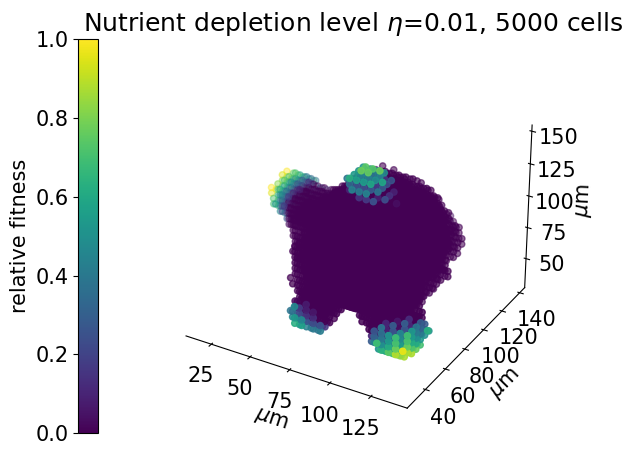

9701

In [10]:
#ASSUMES AN n=40 GRID

beta=0.01
r=1
alpha=1

no_cells = 5000

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("cells_varying_depletion/5000_"+str(r)+"_occupations.npy", allow_pickle=True)


for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        dists_to_other_cells = dists_between_positions[n][np.where(occupations==1)[0]]
        dists_to_other_cells = dists_to_other_cells[np.nonzero(dists_to_other_cells)[0]]#n records distances to all other cells, except itself
        prob_rep = alpha - np.nansum(beta/dists_to_other_cells) if len(dists_to_other_cells) > 0 else alpha
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, location='left', label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Nutrient depletion level "+ r'$\eta$'+ "="+str(beta) + ", " + str(no_cells) + " cells")
fig.tight_layout()
fig.savefig("cells_varying_depletion/"+str(no_cells)+"_"+str(r)+".eps", format="eps", dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


In [ ]:
beta = 10
r = 0
contact_inhib_thresh = 20
h = 1
alpha = 1

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("beta_varying_fig3/"+str(beta)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Nutrient-dependent fitness "+ r'$\beta$'+ "="+str(beta))
fig.tight_layout()
fig.savefig("beta_illus_"+str(beta)+"_"+str(r)+".eps", format="eps", dpi=300)
plt.show()

  

In [ ]:
beta = 2
r = 0
contact_inhib_thresh = 20
h = 0.01
alpha = 1

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("h_varying_fig3/"+str(h)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Steepness of saturation " + '$\it{h}$' + "=" +str(h))
fig.tight_layout()
fig.savefig("h_illus_"+str(h)+"_"+str(r)+".eps", format="eps", dpi=300)
plt.show()

  

In [ ]:
beta = 2
r = 1
contact_inhib_thresh = 20
h = 1
alpha = 1

tau = 1.0

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("tau_varying_fig3/"+str(tau)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Surface tension " +  r'$\tau$'+ "="+str(tau))
fig.tight_layout()
fig.savefig("tau_illus_"+str(tau)+"_"+str(r)+".eps", format="eps", dpi=300)
plt.show()

  

In [ ]:
contact_inhib_thresh=10
r=0
alpha=0
beta=10
h=1


xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("c_varying_fig3/"+str(contact_inhib_thresh)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Neighbour suppression threshold "+ r'$\kappa$'+ "="+str(np.around(contact_inhib_thresh/26, decimals=2)))
fig.tight_layout()
fig.savefig("c_illus_"+str(contact_inhib_thresh)+"_"+str(r)+".eps", format='eps', dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

In [ ]:
contact_inhib_thresh=10
r=0
alpha=0
beta=10
h=1

tau = 1.0

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("tau_varying/tau_varying_"+str(tau)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Surface tension "+ r'$\tau$'+ "="+str(tau))
fig.tight_layout()
fig.savefig("tau_illus_fig6_"+str(tau)+"_"+str(r)+".eps", format='eps', dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


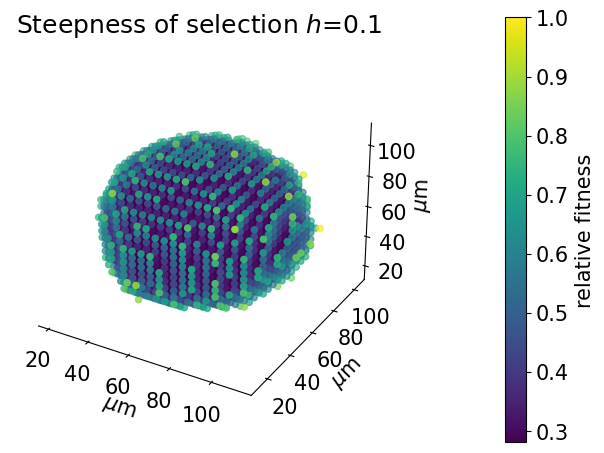

10035

In [27]:
contact_inhib_thresh=10
r=0
alpha=0
beta=10
h=1.0

h = 0.1

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("h_varying/h_varying_"+str(h)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Steepness of selection "+  '$\it{h}$' + "="+str(h))
fig.tight_layout()
fig.savefig("h_illus_fig6_"+str(h)+"_"+str(r)+".eps", format='eps', dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


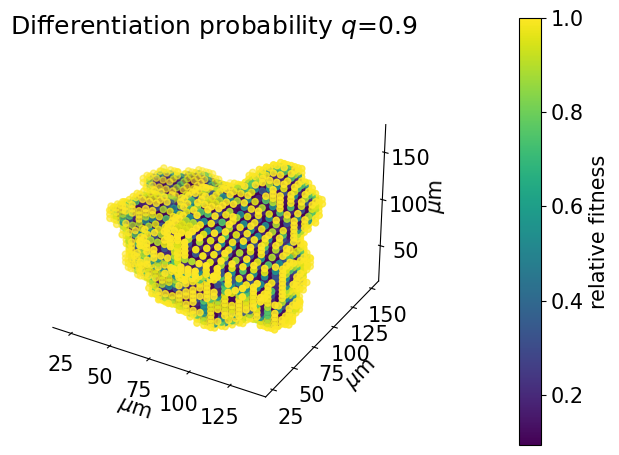

9791

In [25]:
contact_inhib_thresh=20
r=0
alpha=1
beta=10
h=1

q = 0.9

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("q_varying_fig6/"+str(q)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, c=cs_to_plot/max(cs_to_plot))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Differentiation probability "+  '$\it{q}$' + "="+str(q))
fig.tight_layout()
fig.savefig("q_illus_fig6_"+str(q)+"_"+str(r)+".eps", format='eps', dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

In [ ]:
contact_inhib_thresh=20
r=0
alpha=1
beta=0
h=1

q = 0.9

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("q_varying_fig5/"+str(q)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, color='yellow')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Differentiation probability "+  '$\it{q}$' + "="+str(q))
fig.tight_layout()
fig.savefig("q_illus_fig5_"+str(q)+"_"+str(r)+".eps", format='eps', dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

In [ ]:
contact_inhib_thresh=10
r=0
alpha=10
beta=0
h=1

sigma = 2.0

xs_to_plot, ys_to_plot, zs_to_plot, cs_to_plot = [], [], [], []

occupations = np.load("sigma_varying/sigma_varying_"+str(sigma)+"_"+str(r)+"_occupations.npy", allow_pickle=True)

for n in range(N): #all of these should have occupation number 1 or 0 after the last adjustment step
    if occupations[n] == 1:
        occupied_neighbour_no = len(list(filter(lambda i: (occupations[i]==1), neighbours[n]))) #how many neighbours does a cell have?
        prob_rep = alpha + beta/(1+ np.exp(-h*(contact_inhib_thresh-occupied_neighbour_no)))
        xs_to_plot.append(xs[n])
        ys_to_plot.append(ys[n])
        zs_to_plot.append(zs[n])
        cs_to_plot.append(max(0, prob_rep))
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(xs_to_plot, ys_to_plot, zs_to_plot, color='yellow')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#plt.colorbar(p, pad=0.2, label="relative fitness")
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
ax.set_xlabel(r'$\mu$' + "m")
ax.set_ylabel(r'$\mu$' + "m")
ax.set_zlabel(r'$\mu$' + "m")
ax.set_title("Inactivation rate "+   r'$\sigma$' + "="+str(sigma))
fig.tight_layout()
fig.savefig("sigma_illus_"+str(sigma)+"_"+ str(r)+".eps", format='eps', dpi=300)
plt.show()
plt.cla()
plt.clf()
plt.close('all')
gc.collect()


  

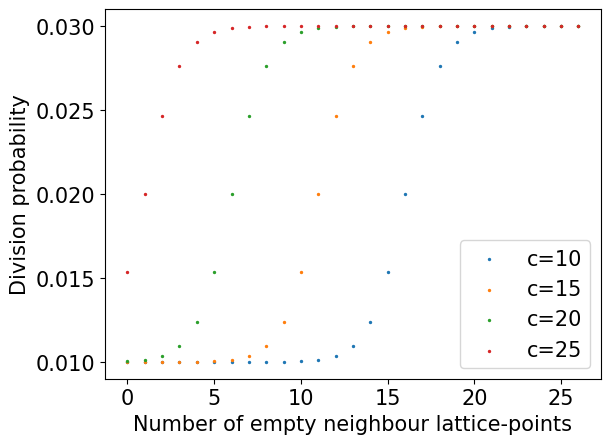

<Figure size 640x480 with 0 Axes>

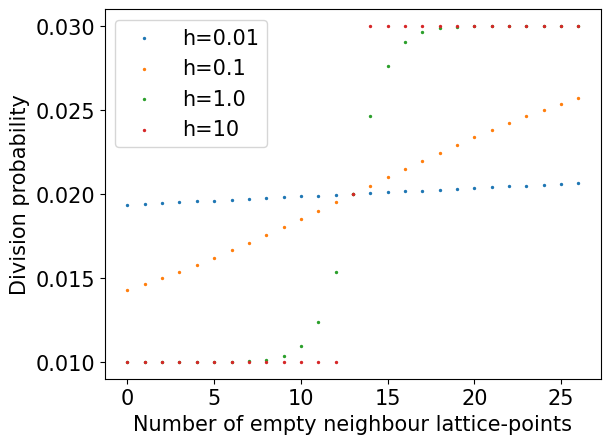

<Figure size 640x480 with 0 Axes>

In [22]:
#produce the diagrams shown in figure 2

fig, ax = plt.subplots()
h=1
for contact_inhib_thresh in [10, 15, 20, 25]:
    plt.scatter(np.arange(27), [(1 + 2/(1+ np.exp(-h*(contact_inhib_thresh-(26-n)))))*0.01 for n in range(27)], s=2,  label='c='+str(contact_inhib_thresh))
plt.xlabel("Number of empty neighbour lattice-points")
plt.ylabel("Division probability")
plt.legend()
plt.show()
plt.clf()

fig, ax = plt.subplots()
contact_inhib_thresh=13
for h in [0.01, 0.1, 1.0, 10]:
    plt.scatter(np.arange(27), [(1 + 2/(1+ np.exp(-h*(contact_inhib_thresh-(26-n)))))*0.01 for n in range(27)], s=2, label='h='+str(h))
plt.xlabel("Number of empty neighbour lattice-points")
plt.ylabel("Division probability")
plt.legend()
plt.show()
plt.clf()
        
        